In [1]:
import pandas as pd
import numpy as np

# RECEIVE AND IMPORT DATA

In [2]:
df = pd.read_csv('raw-dataset/data-t1.csv', error_bad_lines=False, warn_bad_lines=True)
# columns = ['loan_status', 'loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'term', 'dummy']

# Fixed 2 line
# b'Skipping line 52431: expected 8 fields, saw 9\n' --> Current,9500,6.46,A,10+ years,MORTGAGE,138831,, 36 months --> Current,9500,6.46,A,10+ years,MORTGAGE,138831, 36 months
# b'Skipping line 131201: expected 8 fields, saw 9\n' --> Current,10000,8,46,A,5 years,OWN,32000, 36 months --> Current,10000,8.46,A,5 years,OWN,32000, 36 months

# Shows several 
df.head()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,2500,13.56,C,10+ years,RENT,55000,36 months
1,Current,30000,18.94,D,10+ years,MORTGAGE,90000,60 months
2,Current,5000,17.97,D,6 years,MORTGAGE,59280,36 months
3,Current,4000,18.94,D,10+ years,MORTGAGE,92000,36 months
4,Current,30000,16.14,C,10+ years,MORTGAGE,57250,60 months


In [3]:
print(df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
149994             Current       9000     11.55     B  10+ years   
149995     In Grace Period       7000      6.67     A        NaN   
149996             Current      25525     19.92     D    5 years   
149997  Late (31-120 days)      25000     10.08     B   < 1 year   
149998             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  
0                RENT      55000   36 months  
1            MORTGAGE      90000   60 months  
2            MORTGAGE      59280   36 mont

In [4]:
df.describe()

,loan_amnt,int_rate
count,149999.000000,149999.000000
mean,16020.048300,12.908299
std,10138.235301,5.127497
min,1000.000000,6.000000
25%,8000.000000,8.460000
50%,14000.000000,11.800000
75%,21987.500000,16.140000
max,40000.000000,30.990000


In [5]:
df.mode()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,10000,13.56,A,10+ years,MORTGAGE,60000,36 months


# DATA CLEANING FROM INVALID AND NULL VALUES

## 1. CHECKS NULL VALUES AND ADDS HAD_NULL COLLUMN

In [6]:
cleaned_df = df.copy()

In [7]:
cleaned_df['loan_status'].isnull().sum()

0

In [8]:
cleaned_df['loan_amnt'].isnull().sum()

0

In [9]:
cleaned_df['int_rate'].isnull().sum()

0

In [10]:
cleaned_df['grade'].isnull().sum()

0

In [11]:
cleaned_df['emp_length'].isnull().sum()

13668

In [12]:
cleaned_df['home_ownership'].isnull().sum()

1

In [13]:
cleaned_df['annual_inc'].isnull().sum()

0

In [14]:
cleaned_df['term'].isnull().sum()

0

In [15]:
cleaned_df['loan_amnt'].isnull().sum()

0

In [16]:
cleaned_df['had_null'] = True
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
149994             Current       9000     11.55     B  10+ years   
149995     In Grace Period       7000      6.67     A        NaN   
149996             Current      25525     19.92     D    5 years   
149997  Late (31-120 days)      25000     10.08     B   < 1 year   
149998             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  had_null  
0                RENT      55000   36 months      True  
1            MORTGAGE      90000   60 months      True  
2           

## 2. REPLACING NULL VALUES WITH PLACEHOLDERS

In [17]:
null_emp_length_index = cleaned_df[cleaned_df['emp_length'].isnull()].index
null_home_ownership_index = cleaned_df[cleaned_df['home_ownership'].isnull()].index

In [18]:
cleaned_df['home_ownership'].replace({np.nan : "status"}, inplace=True)
cleaned_df['emp_length'].replace({np.nan : "n years"}, inplace=True) # Replaces it with n years so its considered valid

for i in null_emp_length_index:
    cleaned_df.at[i, 'had_null'] = False

for i in null_home_ownership_index:
    cleaned_df.at[i, 'had_null'] = False

In [19]:
cleaned_df.describe()

,loan_amnt,int_rate
count,149999.000000,149999.000000
mean,16020.048300,12.908299
std,10138.235301,5.127497
min,1000.000000,6.000000
25%,8000.000000,8.460000
50%,14000.000000,11.800000
75%,21987.500000,16.140000
max,40000.000000,30.990000


In [20]:
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
149994             Current       9000     11.55     B  10+ years   
149995     In Grace Period       7000      6.67     A    n years   
149996             Current      25525     19.92     D    5 years   
149997  Late (31-120 days)      25000     10.08     B   < 1 year   
149998             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  had_null  
0                RENT      55000   36 months      True  
1            MORTGAGE      90000   60 months      True  
2           

## 3. CLEANING EMP_LENGTH INVALID VALUES

In [21]:
# Checks how many values exist in emp_length
print("Number of unique values in emp_length", len(cleaned_df.emp_length.unique().tolist()))

Number of unique values in emp_length 1049


In [22]:
indexNames = cleaned_df[ ~cleaned_df["emp_length"].str.contains('year$|years$') ].index
cleaned_df.drop(indexNames , inplace=True) # Delete the row indexes from dataFrame
print('Rows deleted = ', len(indexNames))
cleaned_df.reset_index(drop=True, inplace=True)

Rows deleted =  1242


In [23]:
cleaned_df.emp_length.unique().tolist()

['10+ years',
 '6 years',
 '4 years',
 '< 1 year',
 '2 years',
 '9 years',
 'n years',
 '5 years',
 '3 years',
 '7 years',
 '1 year',
 '8 years']

In [24]:
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
148752             Current       9000     11.55     B  10+ years   
148753     In Grace Period       7000      6.67     A    n years   
148754             Current      25525     19.92     D    5 years   
148755  Late (31-120 days)      25000     10.08     B   < 1 year   
148756             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  had_null  
0                RENT      55000   36 months      True  
1            MORTGAGE      90000   60 months      True  
2           

## 4. CLEANING LOAN_STATUS INVALID VALUES

In [25]:
cleaned_df.loan_status.unique().tolist()

['Current',
 'Fully Paid',
 'Late (31-120 days)',
 'In Grace Period',
 'Charged Off',
 'Late (16-30 days)',
 'Fulli Paid',
 'Full Paid',
 'Curren',
 'Curent']

In [26]:
cleaned_df["loan_status"] = cleaned_df["loan_status"].replace(['Fulli Paid','Full Paid'],'Fully Paid')
cleaned_df["loan_status"] = cleaned_df["loan_status"].replace(['Curren','Curent'],'Current')
cleaned_df.loan_status.unique().tolist()

['Current',
 'Fully Paid',
 'Late (31-120 days)',
 'In Grace Period',
 'Charged Off',
 'Late (16-30 days)']

In [27]:
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
148752             Current       9000     11.55     B  10+ years   
148753     In Grace Period       7000      6.67     A    n years   
148754             Current      25525     19.92     D    5 years   
148755  Late (31-120 days)      25000     10.08     B   < 1 year   
148756             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  had_null  
0                RENT      55000   36 months      True  
1            MORTGAGE      90000   60 months      True  
2           

## 5. CLEANING HOME_OWNERSHIP INVALID VALUES

In [28]:
cleaned_df.home_ownership.unique().tolist()

['RENT', 'MORTGAGE', 'OWN', 'ANY', 'MOTGAGE', 'MORGAGE']

In [29]:
cleaned_df["home_ownership"] = cleaned_df["home_ownership"].replace(['MOTGAGE','MORGAGE'],'MORTGAGE')
cleaned_df.home_ownership.unique().tolist()

['RENT', 'MORTGAGE', 'OWN', 'ANY']

In [30]:
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
148752             Current       9000     11.55     B  10+ years   
148753     In Grace Period       7000      6.67     A    n years   
148754             Current      25525     19.92     D    5 years   
148755  Late (31-120 days)      25000     10.08     B   < 1 year   
148756             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  had_null  
0                RENT      55000   36 months      True  
1            MORTGAGE      90000   60 months      True  
2           

## 6. CLEANING TERM FROM INVALID VALUES

In [31]:
cleaned_df.term.unique().tolist()

[' 36 months', ' 60 months']

In [32]:
cleaned_df["loan_status"] = cleaned_df["loan_status"].replace({' 36 months':'36 months', ' 60 months':'60 months'})

In [33]:
cleaned_df.term.unique().tolist()

[' 36 months', ' 60 months']

## 7. CLEANING GRADE FROM INVALID VALUES

In [34]:
cleaned_df.grade.unique().tolist()

['C', 'D', 'B', 'A', 'E', 'F', 'G']

## 8. FIXING AND SETTING COLUMNS TO NUMERICAL VALUES 

In [35]:
cleaned_df["loan_amnt"] = pd.to_numeric(cleaned_df["loan_amnt"], errors='coerce')

cleaned_df["int_rate"] = pd.to_numeric(cleaned_df["int_rate"], errors='coerce')

cleaned_df["annual_inc"] = pd.to_numeric(cleaned_df["annual_inc"], errors='coerce')
cleaned_df["annual_inc"] = np.floor(cleaned_df["annual_inc"])
cleaned_df["annual_inc"] = cleaned_df["annual_inc"].astype(np.int64)
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
148752             Current       9000     11.55     B  10+ years   
148753     In Grace Period       7000      6.67     A    n years   
148754             Current      25525     19.92     D    5 years   
148755  Late (31-120 days)      25000     10.08     B   < 1 year   
148756             Current      18000     23.40     E     1 year   

       home_ownership  annual_inc        term  had_null  
0                RENT       55000   36 months      True  
1            MORTGAGE       90000   60 months      True  
2        

## 9. REPLACING NULL PLACEHOLDERS WITH COLUMN MODE

In [36]:
cleaned_df.groupby('emp_length').count()

,loan_status,loan_amnt,int_rate,grade,home_ownership,annual_inc,term,had_null
emp_length,,,,,,,,
1 year,10395,10395,10395,10395,10395,10395,10395,10395
10+ years,45068,45068,45068,45068,45068,45068,45068,45068
2 years,12574,12574,12574,12574,12574,12574,12574,12574
3 years,11701,11701,11701,11701,11701,11701,11701,11701
4 years,8719,8719,8719,8719,8719,8719,8719,8719
5 years,8985,8985,8985,8985,8985,8985,8985,8985
6 years,6288,6288,6288,6288,6288,6288,6288,6288
7 years,5065,5065,5065,5065,5065,5065,5065,5065
8 years,4742,4742,4742,4742,4742,4742,4742,4742


In [37]:
cleaned_df['home_ownership'].replace({'status' : cleaned_df['home_ownership'].mode()[0]}, inplace=True)
cleaned_df['emp_length'].replace({'n years' : cleaned_df['emp_length'].mode()[0]}, inplace=True)

In [38]:
cleaned_df.groupby('emp_length').count()

,loan_status,loan_amnt,int_rate,grade,home_ownership,annual_inc,term,had_null
emp_length,,,,,,,,
1 year,10395,10395,10395,10395,10395,10395,10395,10395
10+ years,58736,58736,58736,58736,58736,58736,58736,58736
2 years,12574,12574,12574,12574,12574,12574,12574,12574
3 years,11701,11701,11701,11701,11701,11701,11701,11701
4 years,8719,8719,8719,8719,8719,8719,8719,8719
5 years,8985,8985,8985,8985,8985,8985,8985,8985
6 years,6288,6288,6288,6288,6288,6288,6288,6288
7 years,5065,5065,5065,5065,5065,5065,5065,5065
8 years,4742,4742,4742,4742,4742,4742,4742,4742


# DATA CLEANING FROM OUTLIERS

## 1. CHECKING AND DELETING OUTLIERS IN LOAN_AMNT

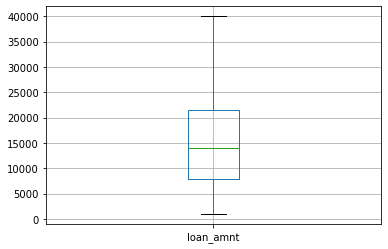

In [39]:
cleaned_df.boxplot(column=["loan_amnt"])

In [40]:
loan_amnt_desc = cleaned_df["loan_amnt"].describe()
cleaned_df["loan_amnt"].describe()

count    148757.000000
mean      15979.284168
std       10117.462174
min        1000.000000
25%        8000.000000
50%       14000.000000
75%       21600.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [41]:
loan_amnt_iqr = 1.5 * (loan_amnt_desc["75%"] - loan_amnt_desc["25%"])
loan_amnt_upper = loan_amnt_desc["75%"] + loan_amnt_iqr
loan_amnt_lower = loan_amnt_desc["25%"] - loan_amnt_iqr

In [42]:
indexNames = cleaned_df[ ~cleaned_df["loan_amnt"].between(loan_amnt_lower, loan_amnt_upper) ].index
cleaned_df.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df["loan_amnt"].describe()

count    148757.000000
mean      15979.284168
std       10117.462174
min        1000.000000
25%        8000.000000
50%       14000.000000
75%       21600.000000
max       40000.000000
Name: loan_amnt, dtype: float64

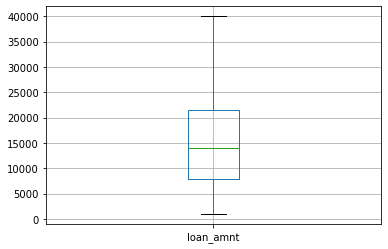

In [43]:
cleaned_df.boxplot(column=["loan_amnt"])

## 2. CHECKING AND DELETING OUTLIERS IN INT_RATE

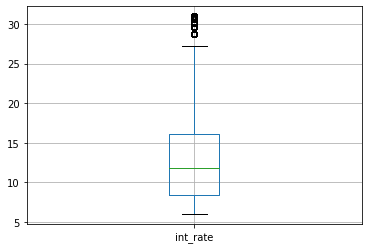

In [44]:
cleaned_df.boxplot(column=["int_rate"])

In [45]:
int_rate_desc = cleaned_df["int_rate"].describe()
cleaned_df["int_rate"].describe()

count    148757.000000
mean         12.913328
std           5.127783
min           6.000000
25%           8.460000
50%          11.800000
75%          16.140000
max          30.990000
Name: int_rate, dtype: float64

In [46]:
int_rate_iqr = 1.5 * (int_rate_desc["75%"] - int_rate_desc["25%"])
int_rate_upper = int_rate_desc["75%"] + int_rate_iqr
int_rate_lower = int_rate_desc["25%"] - int_rate_iqr

In [47]:
indexNames = cleaned_df[ ~cleaned_df["int_rate"].between(int_rate_lower, int_rate_upper) ].index
cleaned_df.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df["int_rate"].describe()

count    148037.000000
mean         12.831330
std           5.002914
min           6.000000
25%           8.460000
50%          11.800000
75%          16.140000
max          27.270000
Name: int_rate, dtype: float64

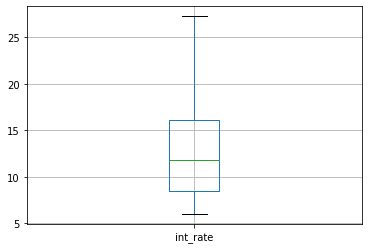

In [48]:
cleaned_df.boxplot(column=["int_rate"])

## 3. CHECKING AND DELETING OUTLIERS IN ANNUAL_INC

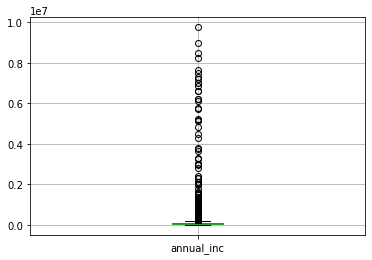

In [49]:
cleaned_df.boxplot(column=["annual_inc"])

In [50]:
annual_inc_desc = cleaned_df["annual_inc"].describe()
cleaned_df["annual_inc"].describe()

count    1.480370e+05
mean     8.221911e+04
std      1.085783e+05
min      0.000000e+00
25%      4.700000e+04
50%      6.800000e+04
75%      9.800000e+04
max      9.757200e+06
Name: annual_inc, dtype: float64

In [51]:
annual_inc_iqr = 1.5 * (annual_inc_desc["75%"] - annual_inc_desc["25%"])
annual_inc_upper = annual_inc_desc["75%"] + annual_inc_iqr
annual_inc_lower = annual_inc_desc["25%"] - annual_inc_iqr

In [52]:
indexNames = cleaned_df[ ~cleaned_df["annual_inc"].between(annual_inc_lower, annual_inc_upper) ].index
cleaned_df.drop(indexNames , inplace=True) # Delete these row indexes from dataFrame
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df["annual_inc"].describe()

count    140206.000000
mean      71127.967648
std       33998.950338
min           0.000000
25%       45000.000000
50%       65000.000000
75%       90000.000000
max      174500.000000
Name: annual_inc, dtype: float64

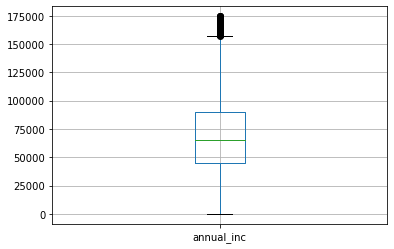

In [53]:
cleaned_df.boxplot(column=["annual_inc"])

In [54]:
print(cleaned_df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
140201             Current       9000     11.55     B  10+ years   
140202     In Grace Period       7000      6.67     A  10+ years   
140203             Current      25525     19.92     D    5 years   
140204  Late (31-120 days)      25000     10.08     B   < 1 year   
140205             Current      18000     23.40     E     1 year   

       home_ownership  annual_inc        term  had_null  
0                RENT       55000   36 months      True  
1            MORTGAGE       90000   60 months      True  
2        

In [55]:
print(df)

               loan_status  loan_amnt  int_rate grade emp_length  \
0                  Current       2500     13.56     C  10+ years   
1                  Current      30000     18.94     D  10+ years   
2                  Current       5000     17.97     D    6 years   
3                  Current       4000     18.94     D  10+ years   
4                  Current      30000     16.14     C  10+ years   
...                    ...        ...       ...   ...        ...   
149994             Current       9000     11.55     B  10+ years   
149995     In Grace Period       7000      6.67     A        NaN   
149996             Current      25525     19.92     D    5 years   
149997  Late (31-120 days)      25000     10.08     B   < 1 year   
149998             Current      18000     23.40     E     1 year   

       home_ownership annual_inc        term  
0                RENT      55000   36 months  
1            MORTGAGE      90000   60 months  
2            MORTGAGE      59280   36 mont

In [56]:
cleaned_df.mode()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term,had_null
0,Current,10000,13.56,A,10+ years,MORTGAGE,60000,36 months,True


In [57]:
df.mode()

,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,term
0,Current,10000,13.56,A,10+ years,MORTGAGE,60000,36 months


# EXPORT CLEANED DATA TO CSV

In [58]:
cleaned_df.to_csv(path_or_buf='cleaned-dataset/LoanDataSet-Cleaned.csv', index=False)